<h1 align="center"><b>Stock Market Technical Analysis</b></h1>
<h2 align="center"><b>Algorithmic Approach</b></h2>
<h2 align="center"><b>for</b></h2>
<h2 align="center"><b>Investing in the Stock Market</b></h2>
<h2 align="center"><b>using Python</b></h2>
<br>
<h1 align="center"><b>Miguel Secillano</b></h1>
<h3 align="center"><b>(2021/2022 Science Fair Project)</b></h3>

<hr>
<br>
<h1 align="center"><b>Notebook 1</b></h1>
<h2 align="center"><b>Single Stock</b></h2>
<h3 align="center"><b>(Initial Experimentation)</b></h3>
<br>
<hr>
<br>

In [287]:
# #%%
# %load_ext autoreload
# %autoreload 2

# Load necessary library modules
import pandas as pd # Data Analysis
import yfinance as yf # Yahoo Finance, where the data comes from
import matplotlib.pyplot as plt # Data Visualization
import matplotlib.ticker as mtick # Data Visualization Formatter
import numpy as np # Data Organizer

plt.style.use("seaborn")

In [288]:
def list_dictionary_pairs(dict):
    print_stock_symbol_name(dict)
    for key, value in dict.items():
        print(key, ":", value)


def print_stock_symbol_name(dict):
    print(dict["symbol"] + ":", dict["shortName"])
    print("=" * 40)


def get_historial_data(ticker):
    return ticker.history(period="max")

def plot_historical_data(df_history, stock_name):
    # makes plot for data
    plt.figure(figsize=(16,9))
    plt.plot(df_history["Close"], label=f"{stock_name} Close")
    plt.title(f"{stock_name} History", fontsize=25, fontweight="bold")
    plt.xlabel("Time (-current)", fontsize=20)
    plt.ylabel("Closing Price (in U.S. dollars)", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.show()

def calculate_monthly_returns(df_history):
    for i in range(1, len(df_history) - 1):
        month = str(df_history.index[i]).split("-")[1]
        drr = df_history["Daily Return"][i]
        daily_return_rate.append((month, drr))
        monthly_return_rate[month] += drr

def plot_monthly_returns(monthly_return_rate, stock_name):
    # makes monthly bar chart for data
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)
    plt.bar(monthly_return_rate.keys(), height=monthly_return_rate.values())
    plt.title(f"{stock_name} Monthly Historical Returns", fontsize=25, fontweight="bold")
    plt.xlabel("Months", fontsize=20)
    plt.ylabel("Monthly Return Rate", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

def plot_monthly_returns_yearly(monthly_return_rate, stock_name):
    # makes monthly bar chart for data
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)
    plt.bar(monthly_return_rate.keys(), height=monthly_return_rate.values())
    plt.title(f"{stock_name} Monthly Historical Returns", fontsize=25, fontweight="bold")
    plt.xlabel("Months", fontsize=20)
    plt.ylabel("Monthly Return Rate", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

def plot_historical_data_monthly_returns(mrr, stock_name):
    # makes plot for data
    plt.figure(figsize=(32,9))
    
    figure, axis = plt.subplots(3, 4)

    plt.title(f"{stock_name} History", fontsize=25, fontweight="bold")
    
    months = {"01": [], "02": [], "03": [], "04": [], "05": [], "06": [],
                       "07": [], "08": [], "09": [], "10": [], "11": [], "12": []}

    for year in mrr.values():
        months["01"].append(year["01"])
        months["02"].append(year["02"])
        months["03"].append(year["03"])
        months["04"].append(year["04"])
        months["05"].append(year["05"])
        months["06"].append(year["06"])
        months["07"].append(year["07"])
        months["08"].append(year["08"])
        months["09"].append(year["09"])
        months["10"].append(year["10"])
        months["11"].append(year["11"])
        months["12"].append(year["12"])
        
    for month in months:
        if month == "01":
            axis[0, 0].plot(np.array(months[month]), label=month)
        if month == "02":
            axis[0, 1].plot(np.array(months[month]), label=month)
        if month == "03":
            axis[0, 2].plot(np.array(months[month]), label=month)
        if month == "04":
            axis[0, 3].plot(np.array(months[month]), label=month)
        if month == "05":
            axis[1, 0].plot(np.array(months[month]), label=month)
        if month == "06":
            axis[1, 1].plot(np.array(months[month]), label=month)
        if month == "07":
            axis[1, 2].plot(np.array(months[month]), label=month)
        if month == "08":
            axis[1, 3].plot(np.array(months[month]), label=month)
        if month == "09":
            axis[2, 0].plot(np.array(months[month]), label=month)
        if month == "10":
            axis[2, 1].plot(np.array(months[month]), label=month)
        if month == "11":
            axis[2, 2].plot(np.array(months[month]), label=month)
        if month == "12":
            axis[2, 3].plot(np.array(months[month]), label=month)

        plt.title(f"{month} Month", fontsize=25, fontweight="bold")
        plt.xlabel("Time (-current)", fontsize=20)
        plt.ylabel("Monthly Returns", fontsize=20)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

    plt.show()

In [289]:
def calculate_monthly_returns_per_year(df_history):
    years = {}
    current_year = 0
    monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
    for i in range(1, len(df_history) - 1):
        year = str(df_history.index[i]).split("-")[0]
        month = str(df_history.index[i]).split("-")[1]

        if current_year != year:
            years[year] = monthly_return_rate
            current_year = year
            monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
        
        if i == len(df_history) - 1:
            years[year] = monthly_return_rate
        
        drr = df_history["Daily Return"][i]
        daily_return_rate.append((month, drr))
        monthly_return_rate[month] += drr
    return years

In [290]:
stock = "^GSPC" # stock symbol ^GSPC
stock_ticker = yf.Ticker(stock)

In [291]:
stock_info = stock_ticker.info

In [292]:
df_history = get_historial_data(stock_ticker) # gets historical data

In [293]:
print(df_history)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1927-12-30    17.660000    17.660000    17.660000    17.660000           0   
1928-01-03    17.760000    17.760000    17.760000    17.760000           0   
1928-01-04    17.719999    17.719999    17.719999    17.719999           0   
1928-01-05    17.549999    17.549999    17.549999    17.549999           0   
1928-01-06    17.660000    17.660000    17.660000    17.660000           0   
...                 ...          ...          ...          ...         ...   
2021-10-18  4463.720215  4488.750000  4447.470215  4486.459961  2683540000   
2021-10-19  4497.339844  4520.399902  4496.410156  4519.629883  2531210000   
2021-10-20  4524.419922  4540.870117  4524.399902  4536.189941  2671560000   
2021-10-21  4532.240234  4551.439941  4526.890137  4549.779785  3016950000   
2021-10-22  4546.120117  4559.669922  4524.000000  4544.899902  

In [294]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23566 entries, 1927-12-30 to 2021-10-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          23566 non-null  float64
 1   High          23566 non-null  float64
 2   Low           23566 non-null  float64
 3   Close         23566 non-null  float64
 4   Volume        23566 non-null  int64  
 5   Dividends     23566 non-null  int64  
 6   Stock Splits  23566 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.4 MB


In [295]:
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [296]:
# deletes the Dividends and Stock Splits columns from data; we don't need them
df_history.drop("Dividends", axis=1, inplace=True)
df_history.drop("Stock Splits", axis=1, inplace=True)
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [297]:
daily_return = df_history["Close"].pct_change(1)

In [298]:
daily_return[1:]

Date
1928-01-03    0.005663
1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-06    0.006268
1928-01-09   -0.009060
                ...   
2021-10-18    0.003375
2021-10-19    0.007393
2021-10-20    0.003664
2021-10-21    0.002996
2021-10-22   -0.001073
Name: Close, Length: 23565, dtype: float64

In [299]:
df_history["Daily Return"] = daily_return

In [300]:
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return'], dtype='object')

In [301]:
df_history

,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.006268
...,...,...,...,...,...,...
2021-10-18,4463.720215,4488.750000,4447.470215,4486.459961,2683540000,0.003375
2021-10-19,4497.339844,4520.399902,4496.410156,4519.629883,2531210000,0.007393
2021-10-20,4524.419922,4540.870117,4524.399902,4536.189941,2671560000,0.003664


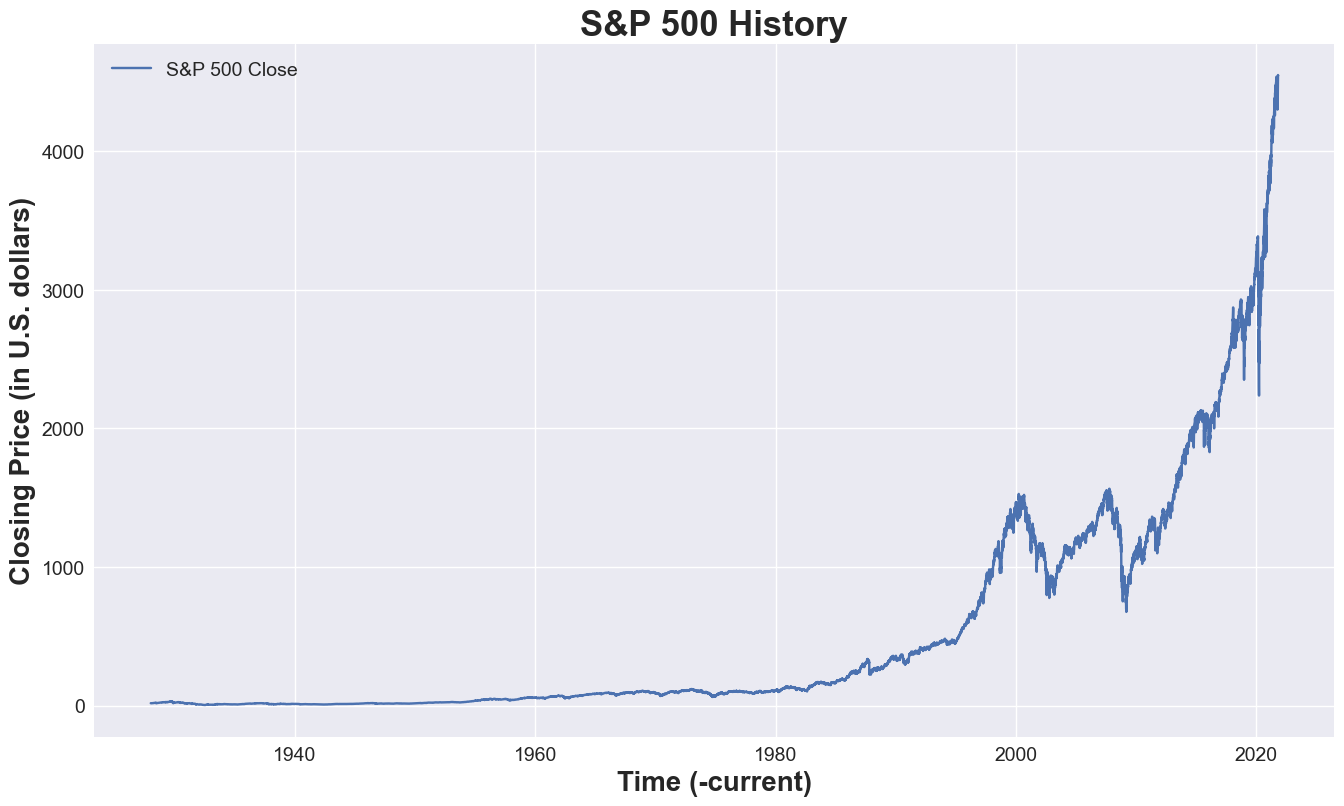

In [302]:
plot_historical_data(df_history, "S&P 500")

In [303]:
daily_return_rate = []
monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
yo = calculate_monthly_returns_per_year(df_history)
yo
# calculate_monthly_returns(df_history)

{'1928': {'01': 0,
  '02': 0,
  '03': 0,
  '04': 0,
  '05': 0,
  '06': 0,
  '07': 0,
  '08': 0,
  '09': 0,
  '10': 0,
  '11': 0,
  '12': 0},
 '1929': {'01': -0.004523030217222002,
  '02': -0.017404777241079916,
  '03': 0.11148133386713155,
  '04': 0.025025916794988556,
  '05': 0.013694099824307582,
  '06': -0.04186210093910203,
  '07': 0.015908714809901747,
  '08': 0.07222713024590821,
  '09': 0.013165732221620208,
  '10': 0.0257574080428018,
  '11': 0.1140626826248069,
  '12': 0.004838858226523524},
 '1930': {'01': 0.056637275908697715,
  '02': -0.004514956391416303,
  '03': 1.4638498864960603e-05,
  '04': 0.01708447547751435,
  '05': -0.040807302656423516,
  '06': 0.09966815921900651,
  '07': 0.05301746507778393,
  '08': 0.09545151039249444,
  '09': -0.0483405172675877,
  '10': -0.19141119422356423,
  '11': -0.12392909012538111,
  '12': 0.029783598174296988},
 '1931': {'01': 0.061360430849681125,
  '02': 0.02203730738840992,
  '03': 0.0376311802691196,
  '04': 0.03270141138481564,
  

In [304]:
yearly_return_rate = 0
for value in monthly_return_rate.values():
    yearly_return_rate += value
yearly_return_rate

0

<Figure size 3200x900 with 0 Axes>

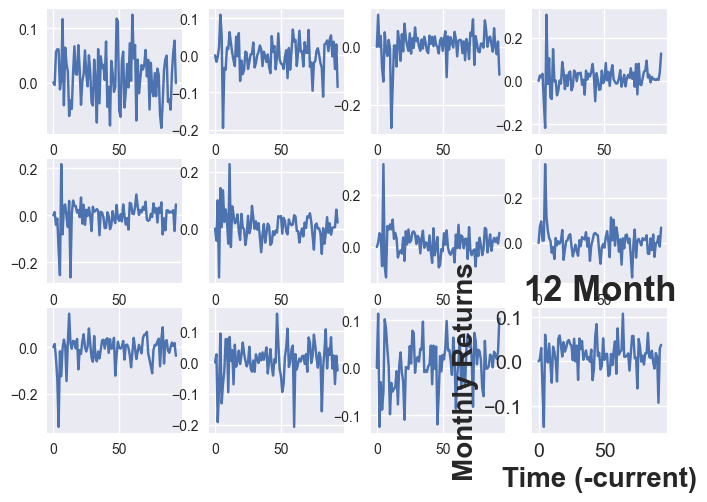

In [305]:
plot_historical_data_monthly_returns(yo, "S&P 500")

In [306]:
from math import pi
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [307]:
stock_symbol = "^GSPC"
stock_ticker = yf.Ticker(stock_symbol)
stock_short_name = stock_ticker.info["shortName"]
# data = yf.download(stock_symbol)
data = yf.download(stock_symbol, start="2020-01-01", end="2021-10-16")

[*********************100%***********************]  1 of 1 completed


In [308]:
data.reset_index(inplace=True)
print(data.columns)
print()
print(data)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

          Date         Open         High          Low        Close  \
0   2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098   
1   2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098   
2   2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029   
3   2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932   
4   2020-01-08  3238.590088  3267.070068  3236.669922  3253.050049   
..         ...          ...          ...          ...          ...   
447 2021-10-11  4385.439941  4415.879883  4360.589844  4361.189941   
448 2021-10-12  4368.310059  4374.890137  4342.089844  4350.649902   
449 2021-10-13  4358.009766  4372.870117  4329.919922  4363.799805   
450 2021-10-14  4386.750000  4439.729980  4386.750000  4438.259766   
451 2021-10-15  4447.689941  4475.819824  4447.689941  4471.370117   

       Adj Close      Volume  
0    3257.850098  3458250000  
1    3234

# [mlpfinance documentation](https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh)

## Need to find a better representation

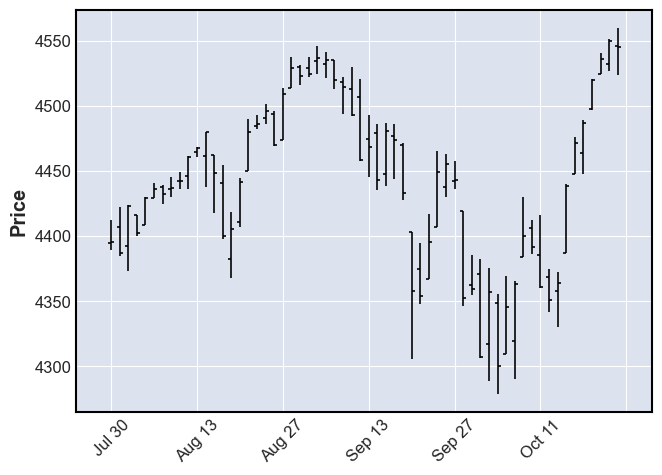

In [309]:
import mplfinance as mpf
mpf.plot(df_history[-60:])
plt.show()

In [310]:
inc = data["Close"] > data["Open"]
dec = data["Open"] > data["Close"]
w = 12 * 60 * 60 * 1000
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

In [311]:
p = figure(
    x_axis_type = "datetime",
    plot_width = 1000,
    tools = TOOLS,
    title = stock_short_name + " - Candlestick Chart 2020-present"
)

In [312]:
p.segment(data["Date"], data["High"], data["Date"], data["Low"], color="black")

GlyphRenderer(id='3446', ...)

In [313]:
p.vbar(
    data["Date"][inc],
    w,
    data["Open"][inc],
    data["Close"][inc],
    fill_color="green",
    line_color="green"
)
p.vbar(
    data["Date"][dec],
    w,
    data["Open"][dec],
    data["Close"][dec],
    fill_color="red",
    line_color="red"
)

GlyphRenderer(id='3460', ...)

In [314]:
show(p)